In [11]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [ ]:
df = pd.read_csv('hotel_for_EDA.csv')

In [ ]:
df

In [ ]:
df['ArrivalDateYear'] = df['ArrivalDateYear'].astype(str)

In [ ]:
df['ArrivalDateDayOfMonth'] = df['ArrivalDateDayOfMonth'].astype(str)

In [ ]:
df['ArrivalDate'] = df[['ArrivalDateYear', 'ArrivalDateMonth']].agg('-'.join, axis=1)

In [ ]:
df

[Text(0.5, 1.0, 'Hotel Cancellation from 2015-July to 2017-August')]

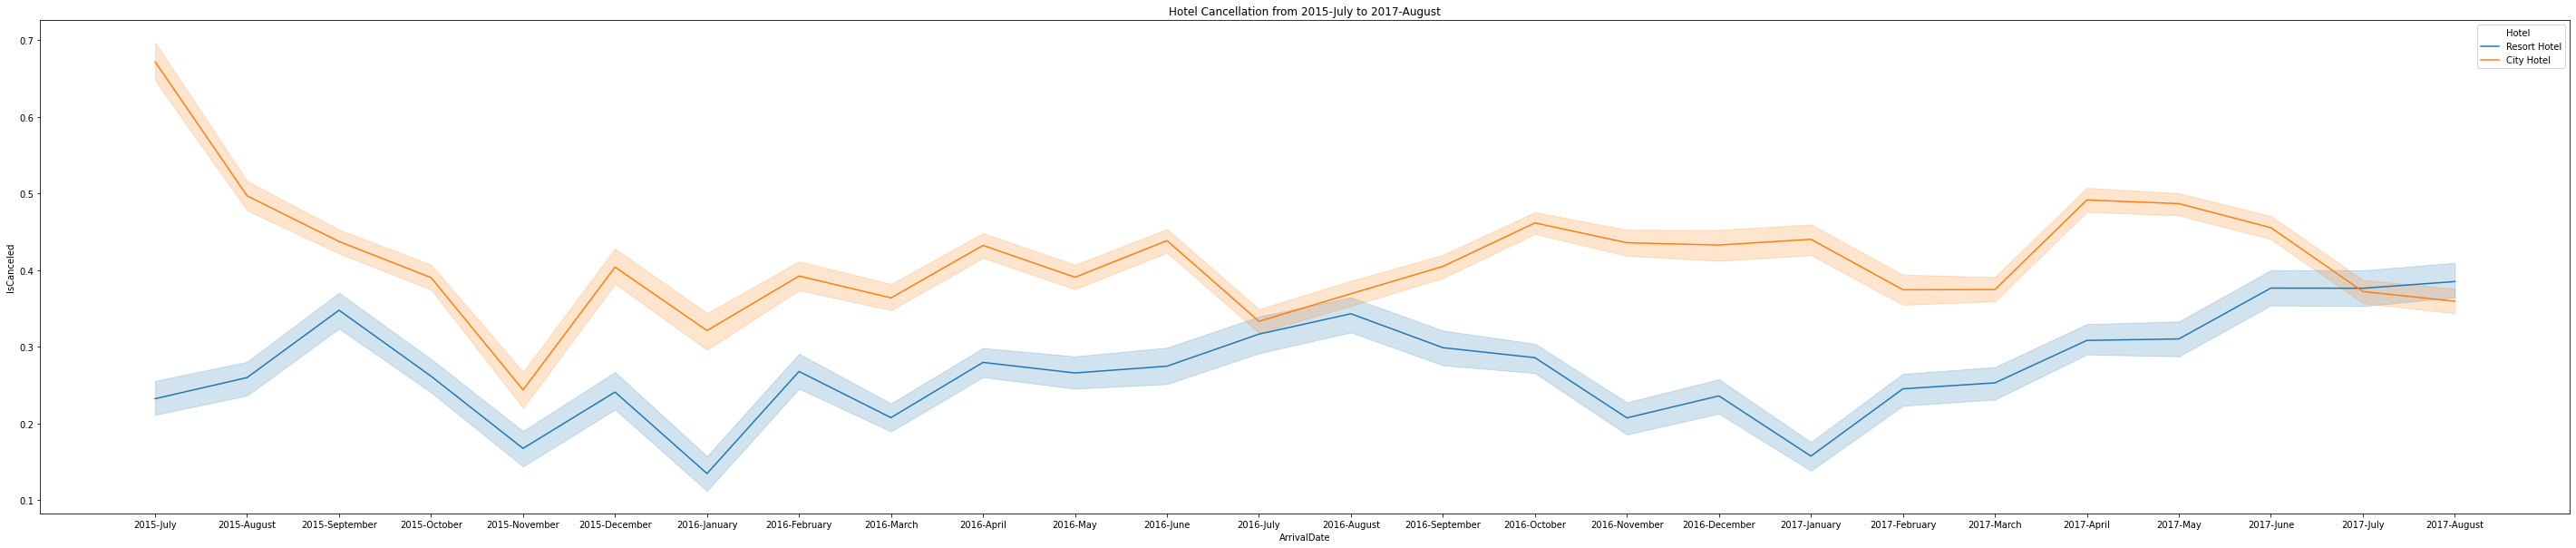

In [32]:
plt.figure(figsize=(50,10))
sns.lineplot(data=df, x='ArrivalDate', y='IsCanceled', hue='Hotel', sort=False).set(title='Hotel Cancellation from 2015-July to 2017-August')

&lt;seaborn.axisgrid.FacetGrid at 0x7fe25c478a00&gt;

&lt;Figure size 2880x720 with 0 Axes&gt;

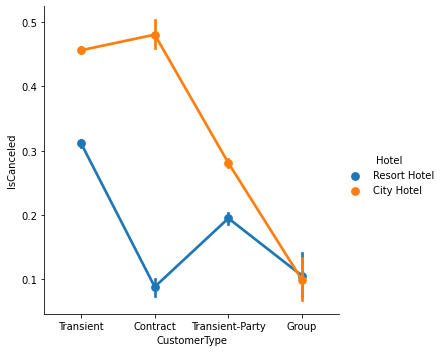

In [9]:
plt.figure(figsize=(40,10))
sns.catplot(x="CustomerType", y="IsCanceled", hue='Hotel', kind='point', data=df)

In [10]:
country_data = pd.DataFrame(df.loc[df['IsCanceled'] == 0]['Country'].value_counts())

country_data.rename(columns={'Country':'Number of Guests'}, inplace=True)
total_guests = country_data['Number of Guests'].sum()
country_data['Guests i %'] = round(country_data['Number of Guests']/total_guests*100, 2)
country_data['Country'] = country_data.index

fig = px.pie(country_data,
             values='Number of Guests',
             names='Country',
             title='Country of Guests',
             template='seaborn')
        
fig.update_traces(textposition = 'inside', textinfo='value+percent+label')

fig.show()

In [24]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [26]:
username='Jeffxxx'
api_key='3IYXXdu0s7O5qFMTwCqO'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)


In [28]:
py.plot(fig, filname = 'pieplot_country', auto_open=False)

'https://plotly.com/~Jeffxxx/2/'